In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read file from csv 
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

Data Cleaning and Preprocessing

In [3]:
print(df.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
print(df.shape)

(243, 15)


In [6]:
print(df.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [7]:
print(df.describe())

              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606 

In [8]:
#  Dataset doesn't have any null values
print(df.isna().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [9]:
# Checking unique values for column 'Classes'
print('Checking how many unique values for column Classes\n')
print(df['Classes'].value_counts())             # Here there are 8 unique categories

Checking how many unique values for column Classes

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


In [10]:
print('Remove leading and trailing spaces\n')
# Remove leading and trailing spaces
df['Classes'] = df['Classes'].str.strip()

# Rechecking for unique values
print(df['Classes'].value_counts())

Remove leading and trailing spaces

Classes
fire        137
not fire    106
Name: count, dtype: int64


In [11]:
print('Convert categorical values to numerical\n')
# Convert categorical values  to numerical (1 and 0)
df['Classes'] = df['Classes'].replace({'fire':1,'not fire':0})
print(df['Classes'].value_counts())

Convert categorical values to numerical

Classes
1    137
0    106
Name: count, dtype: int64


In [12]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [13]:
# Check for outliers in the target variable (FWI) to ensure they do not distort model performance
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['FWI'].quantile(0.25)
Q3 = df['FWI'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find maximum and minimum value
max_value = df['FWI'].max()
min_value = df['FWI'].min()

# Print outlier boundaries and maximum/minimum values of fare_amount.
print('\nLower Bound:', lower_bound)
print('Upper Bound:', upper_bound)
print("\nMaximum value in column '{}' is: {}".format('FWI', max_value))
print("Minimum value in column '{}' is: {}".format('FWI', min_value))

# Identify outliers
outlier_condition = (df['FWI'] < lower_bound) | (df['FWI'] > upper_bound)
outliers = df[outlier_condition]

print("Outlier Rows:")
print(outliers)



Lower Bound: -15.425
Upper Bound: 27.575

Maximum value in column 'FWI' is: 31.1
Minimum value in column 'FWI' is: 0.0
Outlier Rows:
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI  \
89    29      8  2012           35  48  18   0.0  90.1  54.2  220.4  12.5   
171   21      7  2012           36  29  18   0.0  93.9  39.6   80.6  18.5   
206   25      8  2012           34  40  18   0.0  92.1  56.3  157.5  14.3   
207   26      8  2012           33  37  16   0.0  92.2  61.3  167.2  13.1   

      BUI   FWI  Classes  Region  
89   67.4  30.2        1       0  
171  39.5  30.0        1       1  
206  59.5  31.1        1       1  
207  64.0  30.3        1       1  


Data Visualization and Observations

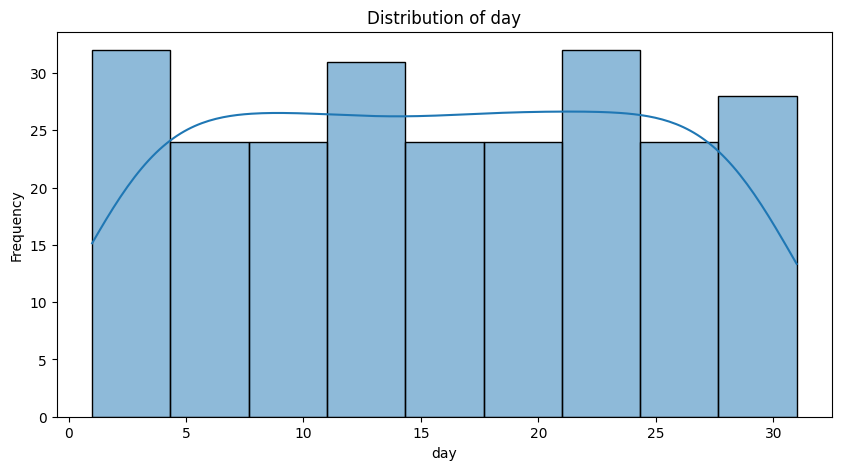

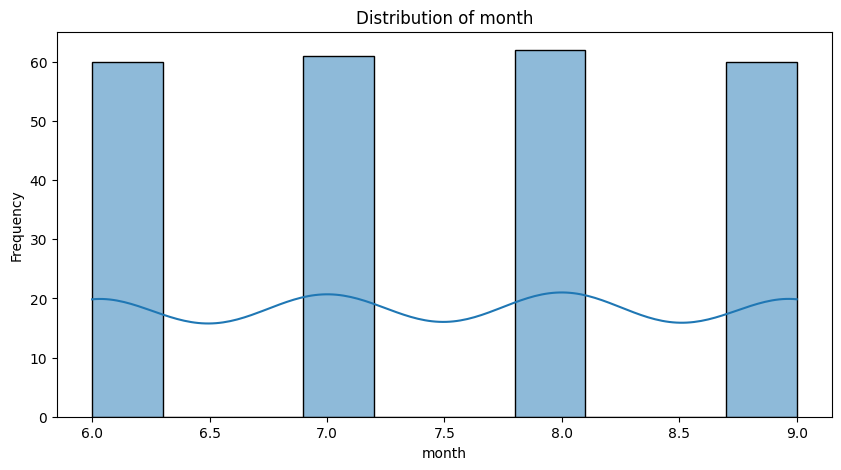

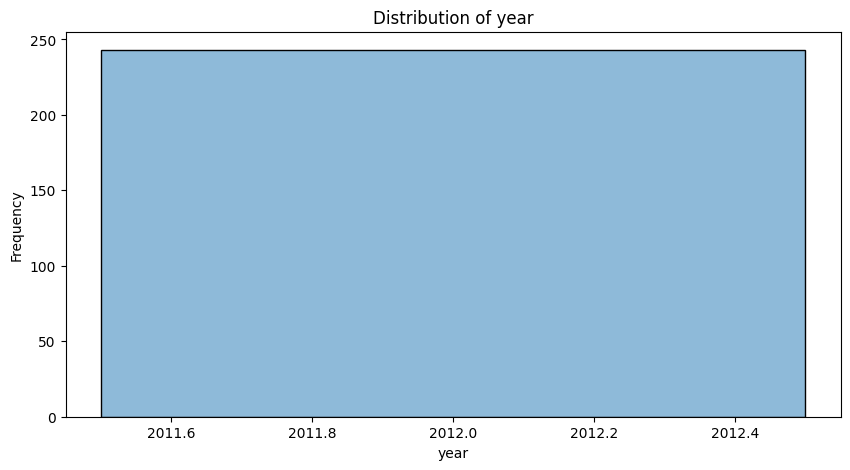

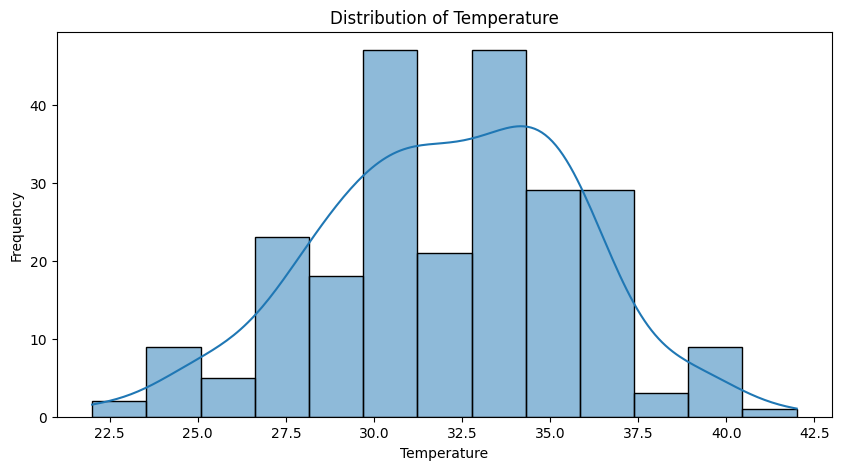

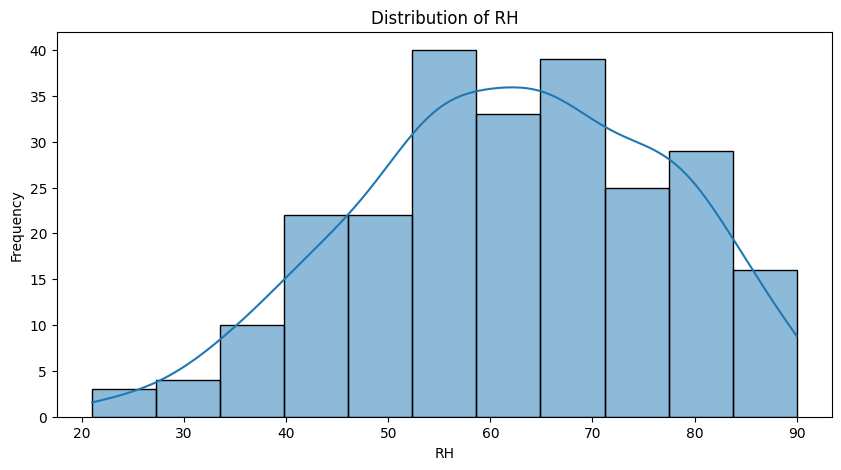

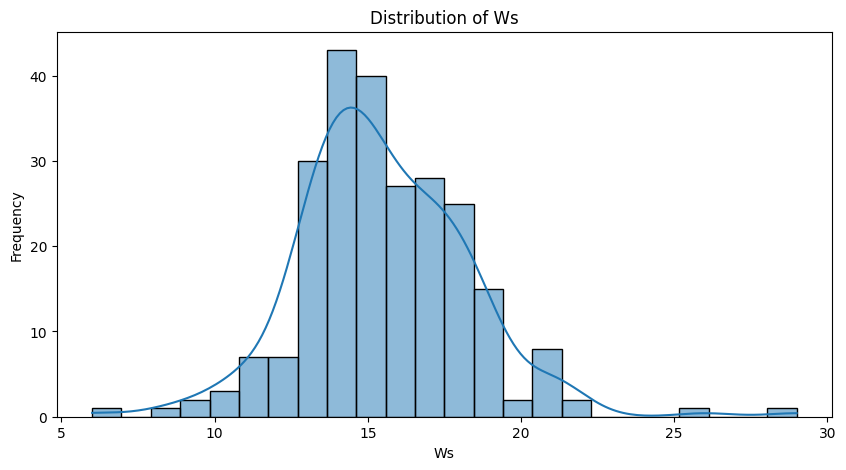

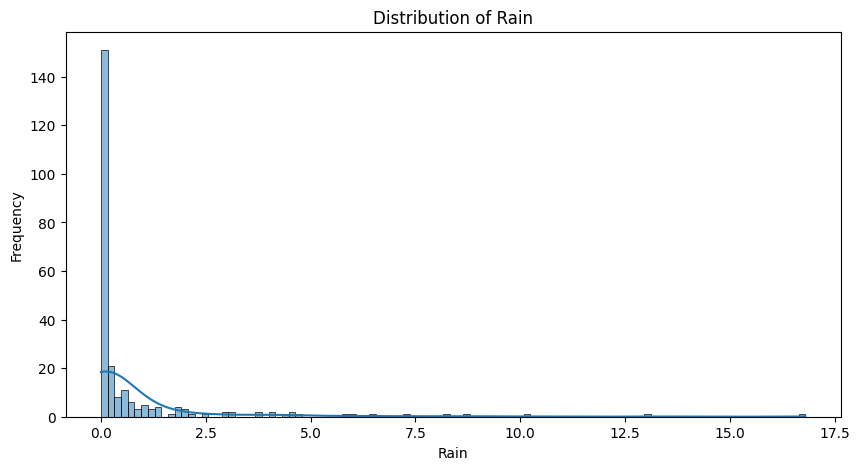

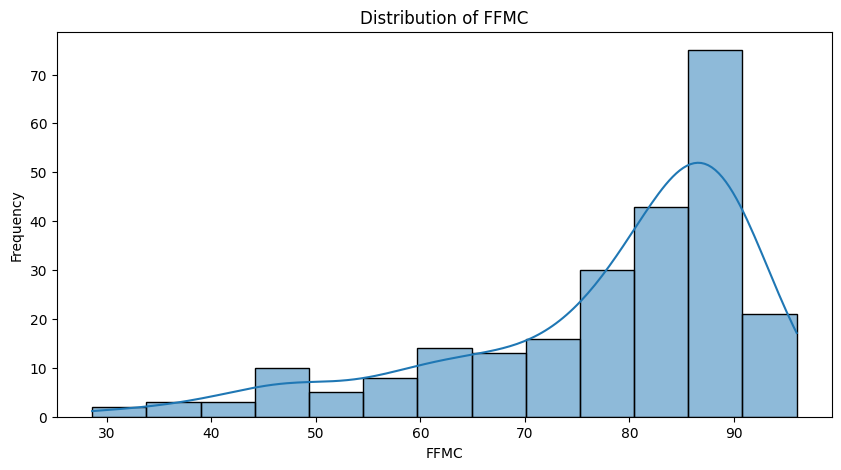

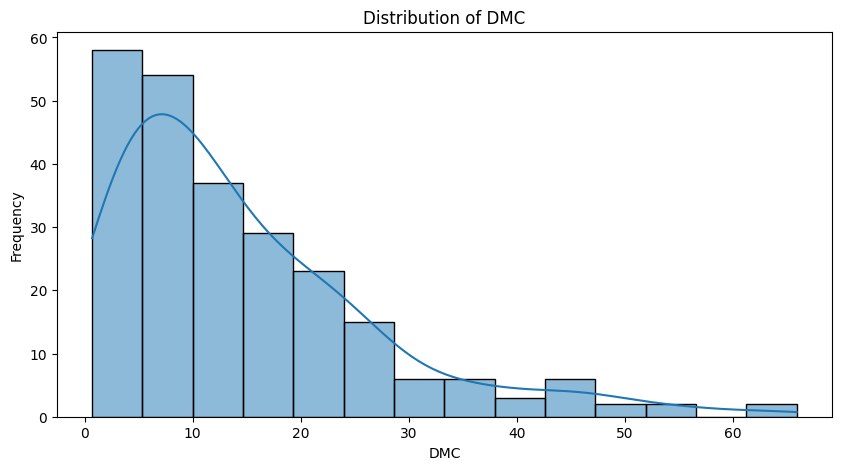

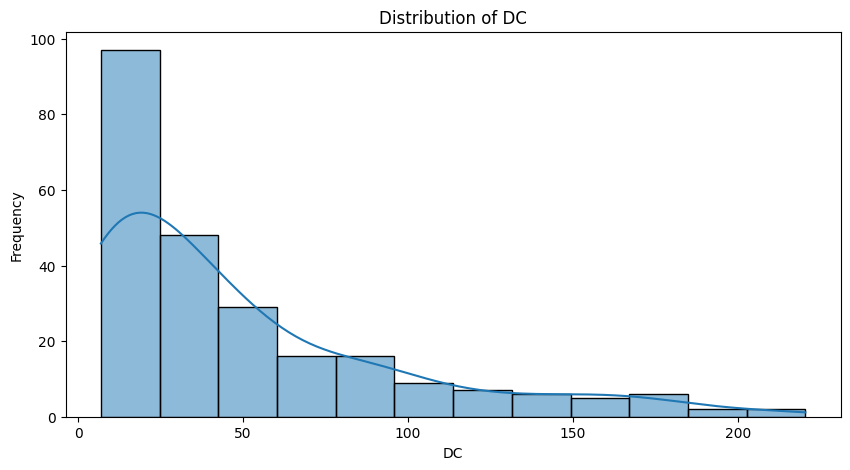

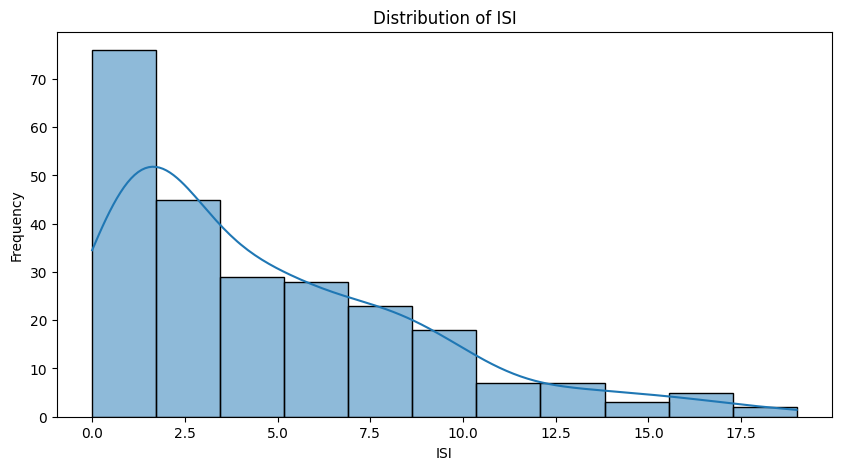

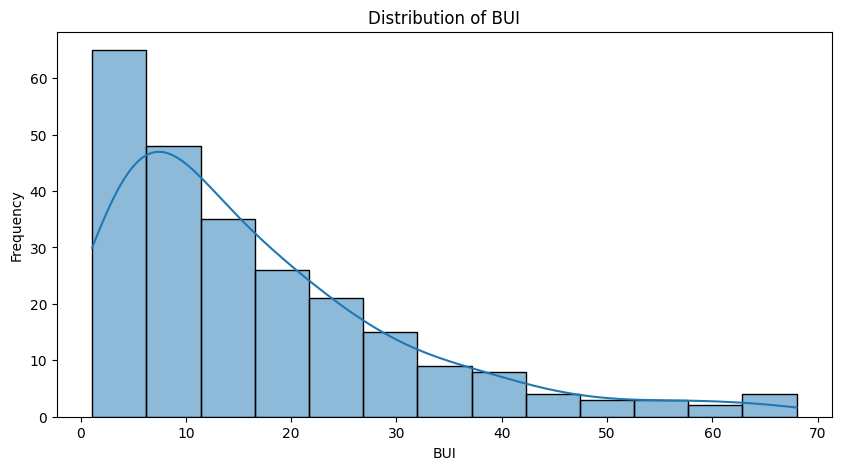

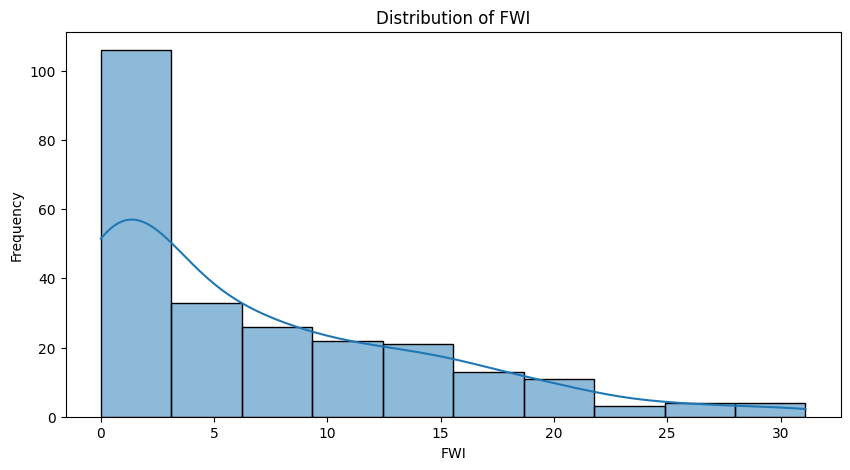

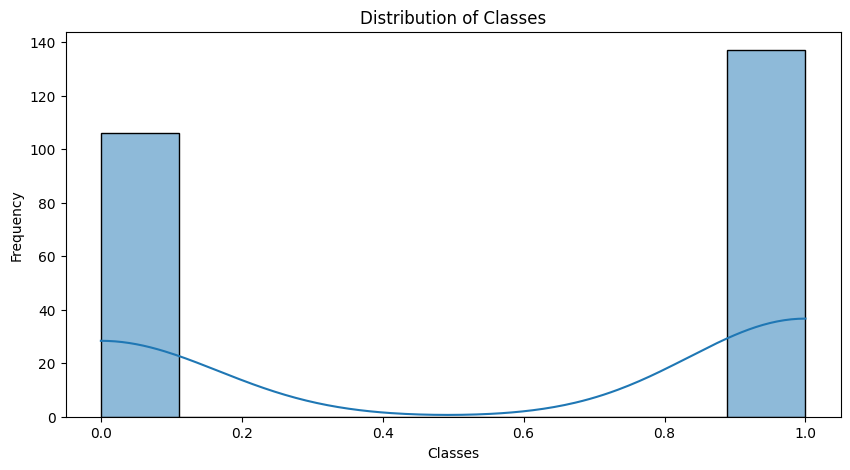

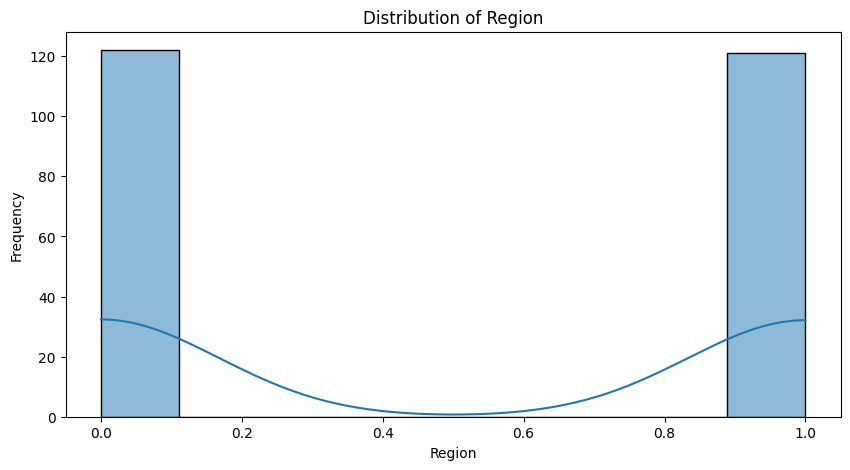

In [14]:
# Univariate analysis using histplot and kdeplot
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


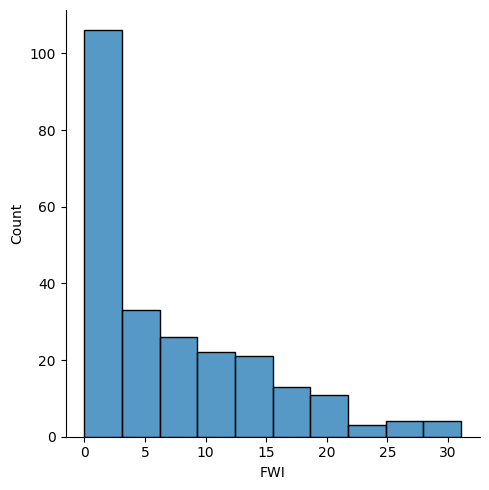

In [15]:
sns.displot(df['FWI'])
plt.show()

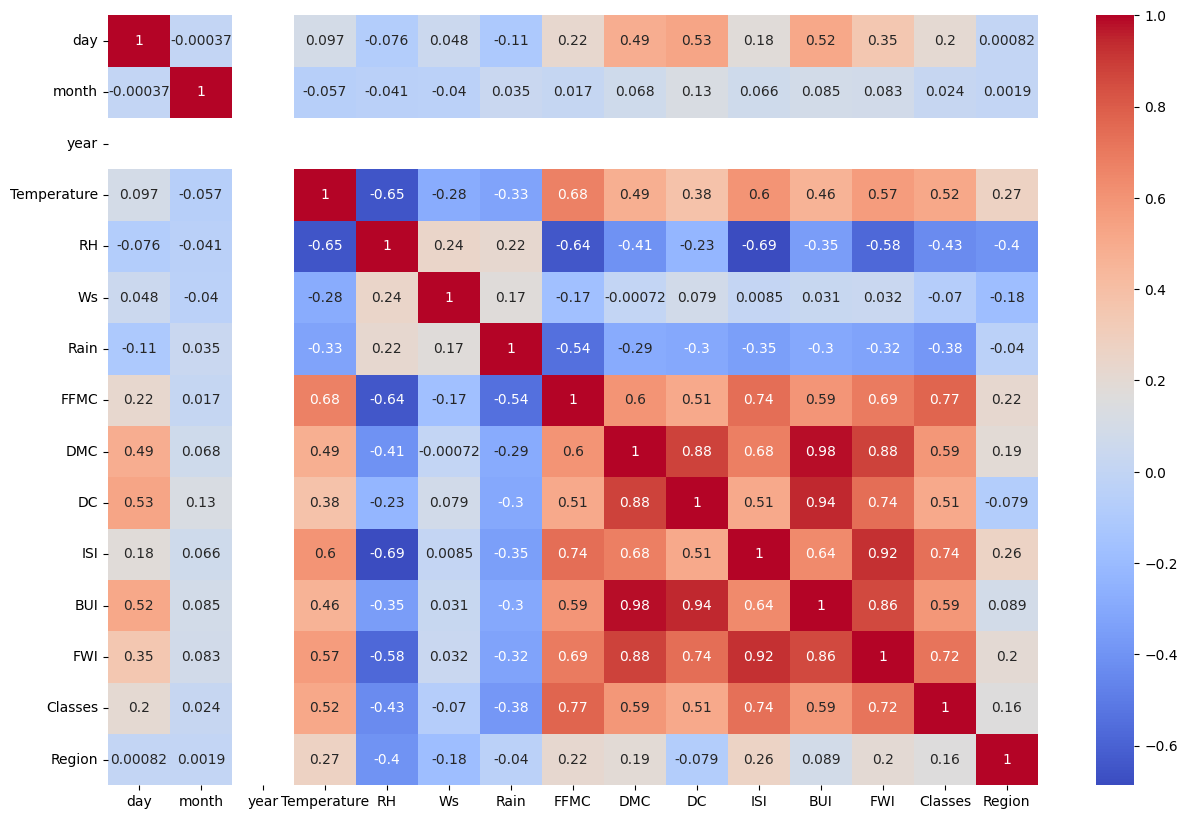

In [16]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

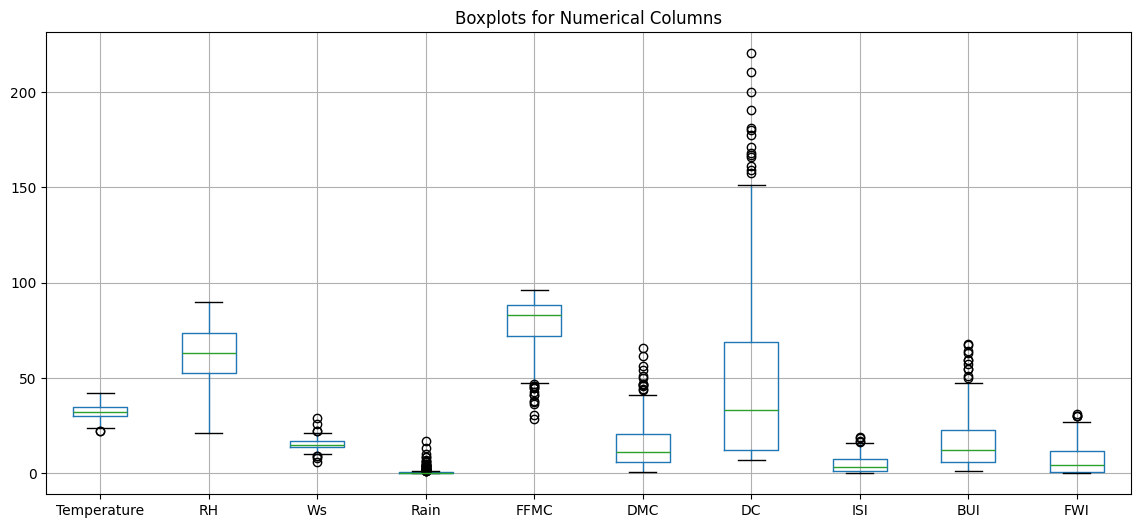

In [17]:
# Create box plots for numerical columns
plt.figure(figsize=(14, 6))
df.boxplot(column=['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'])
plt.title('Boxplots for Numerical Columns')
plt.show()

In [18]:
# Drop the 'year' column due to lack of variability and DMC for high correlation with BUI
df = df.drop(columns=['year','DMC'])
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int64  
 12  Region       243 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 24.8 KB


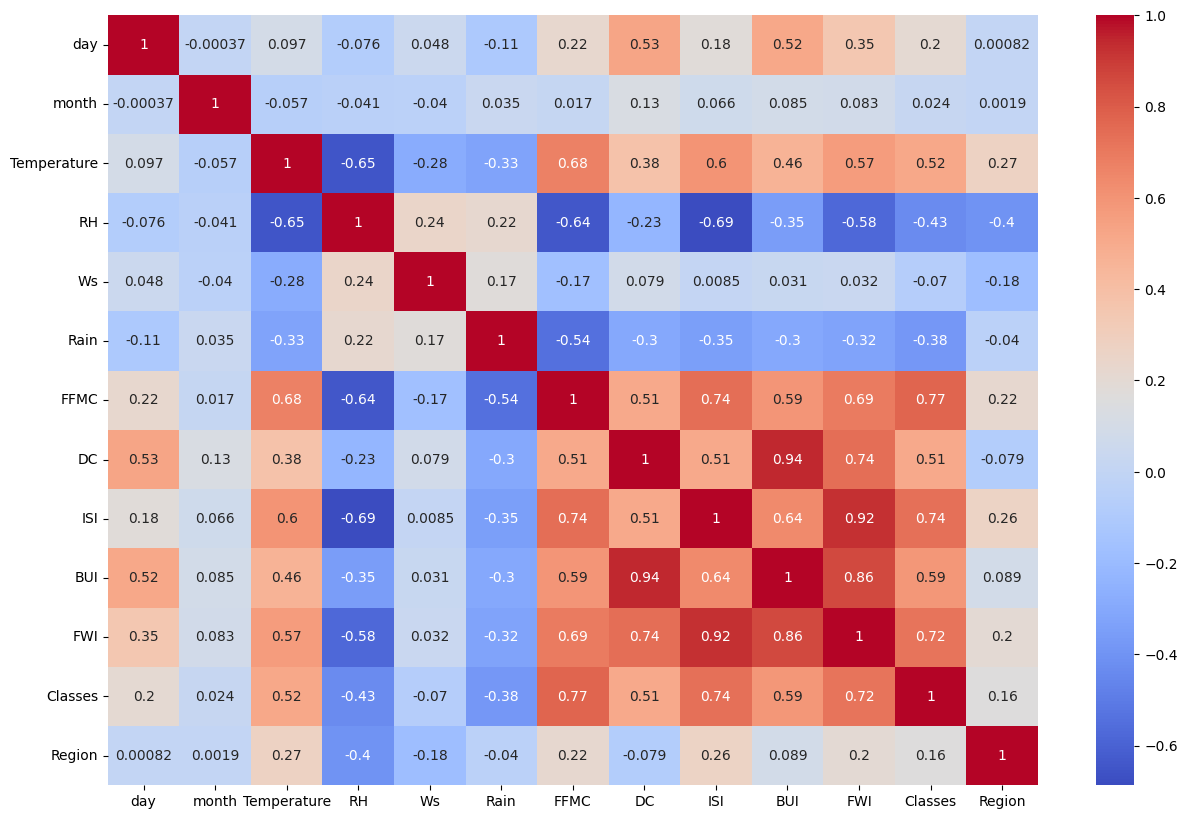

In [19]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

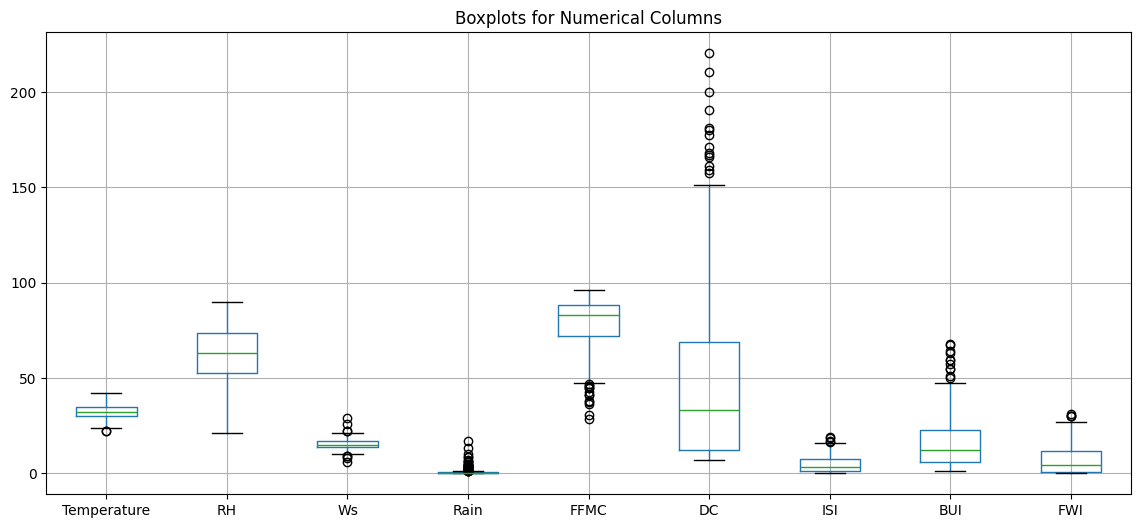

In [20]:
# Create box plots for numerical columns
plt.figure(figsize=(14, 6))
df.boxplot(column=['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DC', 'ISI', 'BUI', 'FWI'])
plt.title('Boxplots for Numerical Columns')
plt.show()

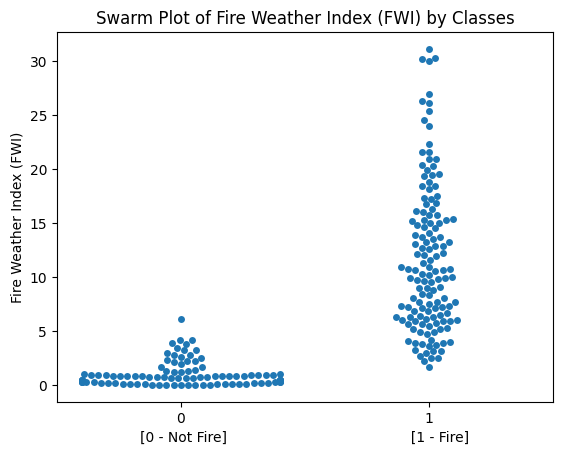

In [21]:
# Swarm plot comparing the Fire Weather Index (FWI) for two classes
sns.swarmplot(x='Classes', y='FWI', data=df)

# Customize the plot
plt.title('Swarm Plot of Fire Weather Index (FWI) by Classes')
plt.xlabel('[0 - Not Fire]                                          [1 - Fire]')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()

Model Development and Analysis

In [22]:
print('Split the data into input and target variable\n')
# split the data into Inputs and a target variable

X=df.drop(['FWI'], axis=1)
y=df['FWI']

print(X.shape)
print(y.shape)

Split the data into input and target variable

(243, 12)
(243,)


In [23]:
# split the input data & target into train & test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train and Test data shape\n')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Train and Test data shape

(194, 12) (49, 12) (194,) (49,)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_sc=scaler.fit_transform(X_train)
x_test_sc=scaler.transform(X_test)


Model Evaluation and Testing - Linear Regression model

In [25]:
# import libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [26]:
# intiate the object_names for models
lr=LinearRegression()

# train the model
print("Performance Metrics of Linear Regression Model")
print()
lr.fit(x_train_sc, y_train)
print("coefficients", lr.coef_)
print("intercept", lr.intercept_)
y_pred_tr=lr.predict(x_train_sc)    # prediction on train_data
y_pred_ts=lr.predict(x_test_sc)     # prediction on test_data
print()

print()
print("="*150)
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("="*150)
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

print()
print("="*150)


Performance Metrics of Linear Regression Model

coefficients [ 0.10054751  0.04970691 -0.03289219 -0.20379154 -0.0738861  -0.01258924
 -0.91462029 -0.73084033  5.08872178  4.39778444  0.30077995 -0.17163469]
intercept 7.420103092783506


Performance Metrics on train data
r2_score 0.973848192834486
mean_absolute_error 0.6822906373442905
mean_squared_error 1.5866478805456625
root_mean_squared_error 1.2596221181551484

Performance Metrics on test data
r2_score 0.9895287145097736
mean_absolute_error 0.4232854367787548
mean_squared_error 0.31736813419084925
root_mean_squared_error 0.5633543593430774



Model Evaluation and Testing - Polynomial Regression Model

In [27]:
# train the model
print("Performance Metrics of Polynomial Regression Model")
print()

# Transform data to polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)

# Create polynomial features from the scaled training data
X_train_poly = poly_features.fit_transform(x_train_sc)  # Fit and transform the training data

# Fit the polynomial regression model
lr.fit(X_train_poly, y_train)
# Print coefficients and intercept
print("coefficients", lr.coef_)
print("intercept", lr.intercept_)

# Predict on train data
y_pred_poly_tr = lr.predict(X_train_poly)

# Transform the scaled test data to polynomial features
X_test_poly = poly_features.transform(x_test_sc)  # Only transform the test data
# Predict on test data
y_pred_poly_ts = lr.predict(X_test_poly)
print()


Performance Metrics of Polynomial Regression Model

coefficients [ 9.20945475e-13  6.96222841e-03  9.05223313e-02  1.57476102e-01
 -2.14483963e-01  3.85746617e-01 -1.07086390e-01  4.94842480e+00
  4.54437355e-02  2.18830824e+00  3.14453326e+00  2.27097732e+10
 -1.44038767e+09  8.24755192e-02 -7.66129550e-03  9.80125407e-03
  3.11559772e-02  2.54060519e-02  7.40264667e-02  8.53324731e-02
  4.51371222e-01  4.60451702e-02 -5.85463503e-01 -3.07826436e-02
  4.62089292e-02  3.18557849e-02  1.10450820e-01  4.49952341e-02
 -1.17397534e-02  9.45645198e-03  5.03599584e-02  3.01952020e-01
  1.77662703e-02 -2.95820951e-01 -3.84759903e-02  9.22679901e-03
  2.40182877e-03 -4.78398800e-02  6.95068836e-02  2.25320280e-01
 -1.69324875e-01 -5.93854904e-01  7.38182068e-02  6.03634357e-01
 -8.72731209e-03 -3.77781391e-02 -4.98056412e-02 -2.96144485e-02
 -5.87181211e-01  8.92895460e-03 -5.02177358e-01 -2.51698732e-01
  7.09161043e-01 -4.99296188e-03 -5.27553558e-02  9.86862183e-03
  1.37737751e-01 -5.07140

In [28]:
print("Performance Metrics of Polynomial Regression Model")
print()
print("="*150)
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_poly_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_poly_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_poly_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_poly_tr)))

print()
print("="*150)
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_poly_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_poly_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_poly_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_poly_ts)))

print()
print("="*150)

Performance Metrics of Polynomial Regression Model

Performance Metrics on train data
r2_score 0.999690191814926
mean_absolute_error 0.09903829712228678
mean_squared_error 0.01879627274368611
root_mean_squared_error 0.13709949942901362

Performance Metrics on test data
r2_score 0.9946171450472812
mean_absolute_error 0.2451431663668886
mean_squared_error 0.16314583673216435
root_mean_squared_error 0.4039131549382421



Application of Regularization Techniques

In [29]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# intiate the object_names for models
rd=Ridge(alpha=0.01)
ls=Lasso(alpha=0.01)
en=ElasticNet(alpha=0.01)

In [30]:
print("Performance Metrics of Ridge Regression Model")
print()
rd.fit(x_train_sc, y_train)
print("coefficients", rd.coef_)
print("intercept", rd.intercept_)
y_pred_tr=rd.predict(x_train_sc) # prediction on train_data
y_pred_ts=rd.predict(x_test_sc) # prediction on test_data
print()

print()
print("="*150)
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("="*150)
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)

Performance Metrics of Ridge Regression Model

coefficients [ 0.10052489  0.04959425 -0.03296918 -0.20409909 -0.07388582 -0.01239493
 -0.91415365 -0.72734739  5.08832989  4.39411551  0.30089631 -0.17112913]
intercept 7.420103092783506


Performance Metrics on train data
r2_score 0.9738481749252212
mean_absolute_error 0.6822994921598821
mean_squared_error 1.586648967112905
root_mean_squared_error 1.2596225494619033

Performance Metrics on test data
r2_score 0.9895259439305577
mean_absolute_error 0.42313762198472576
mean_squared_error 0.3174521060734977
root_mean_squared_error 0.5634288828889568



In [31]:
print("Performance Metrics of Lasso Regression Model")
print()
ls.fit(x_train_sc, y_train)
print("coefficients", ls.coef_)
print("intercept", ls.intercept_)
y_pred_tr=ls.predict(x_train_sc) # prediction on train_data
y_pred_ts=ls.predict(x_test_sc) # prediction on test_data
print()

print()
print("="*150)
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("="*150)
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)

Performance Metrics of Lasso Regression Model

coefficients [ 7.92267795e-02  2.69465881e-02 -1.90536562e-02 -1.58197826e-01
 -6.87407321e-02  2.56675519e-03 -8.37154846e-01 -4.12158600e-01
  5.12739474e+00  4.07622764e+00  2.35268067e-01 -1.08065504e-01]
intercept 7.420103092783506


Performance Metrics on train data
r2_score 0.9736978125870321
mean_absolute_error 0.6706612839661111
mean_squared_error 1.595771552167603
root_mean_squared_error 1.2632385175285001

Performance Metrics on test data
r2_score 0.9899608969918331
mean_absolute_error 0.40434686018652805
mean_squared_error 0.30426936536354426
root_mean_squared_error 0.5516061687141871



In [32]:
print("Performance Metrics of ElasticNet Regression Model")
print()
en.fit(x_train_sc, y_train)
print("coefficients", en.coef_)
print("intercept", en.intercept_)
y_pred_tr=en.predict(x_train_sc) # prediction on train_data
y_pred_ts=en.predict(x_test_sc) # prediction on test_data
print()

print()
print("="*150)
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("="*150)
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

Performance Metrics of ElasticNet Regression Model

coefficients [ 0.08862711  0.03096905 -0.03042527 -0.21218556 -0.06768169  0.00941581
 -0.83521989 -0.30051853  5.05794831  3.95209753  0.2837237  -0.10014007]
intercept 7.420103092783506


Performance Metrics on train data
r2_score 0.9735823910852969
mean_absolute_error 0.681954099048186
mean_squared_error 1.6027742529728937
root_mean_squared_error 1.2660072088945202

Performance Metrics on test data
r2_score 0.9890649329103196
mean_absolute_error 0.42734117828578777
mean_squared_error 0.3314246223868909
root_mean_squared_error 0.5756949039090853


Cross-validation and Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the parameter grid for multiple models including polynomial features
param_grid = [
    {
        'model': [Ridge(), Lasso(), ElasticNet()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'poly_features__degree': [1, 2, 3]  # Same degrees for all models
    }
]

# Create a pipeline that includes PolynomialFeatures and a placeholder for the model
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),    # Add PolynomialFeatures to the pipeline
    ('model', Ridge())                          # Placeholder for the model, will be replaced by GridSearchCV
])

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train_sc, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_


Best Parameters: {'model': ElasticNet(), 'model__alpha': 0.001, 'poly_features__degree': 2}
Best Score: -0.5081385041696114


In [34]:
print("Performance Metrics of GridSearchCV Model")

y_pred_gscv_tr=best_model.predict(x_train_sc)   # prediction on train_data
y_pred_gscv_ts=best_model.predict(x_test_sc)    # prediction on test_data

print()
print("="*150)
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_gscv_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_gscv_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_gscv_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_gscv_tr)))

print()
print("="*150)
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_gscv_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_gscv_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_gscv_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_gscv_ts)))

Performance Metrics of GridSearchCV Model

Performance Metrics on train data
r2_score 0.9995509109554945
mean_absolute_error 0.11918518664579754
mean_squared_error 0.02724653696515745
root_mean_squared_error 0.16506525062882693

Performance Metrics on test data
r2_score 0.9944381412049754
mean_absolute_error 0.25311482933772794
mean_squared_error 0.16857116063328262
root_mean_squared_error 0.41057418408039564


Additional Steps in Feature Engineering (these were not part of the final model used for evaluation)

Note: Despite implementing these feature engineering steps, including removing outliers and applying PCA, the model performance actually worsened compared to the previous version. This outcome indicates that these modifications did not enhance the model's predictive capabilities, underscoring the need for thorough evaluation and validation of feature engineering techniques.

In [35]:
# Remove outliers from the DataFrame
df_no_outliers = df[~outlier_condition]

# Check the shape of the new DataFrame
print("\nOriginal DataFrame Shape:", df.shape)
print("New DataFrame Shape after removing outliers:", df_no_outliers.shape)

# Optional: Display some statistics of the cleaned DataFrame
print("\nStatistics of DataFrame after removing outliers:")
print(df_no_outliers.describe())



print('Split the data into input and target variable\n')
# split the data into Inputs and a target variable

X_ol=df_no_outliers.drop(['FWI'], axis=1)
y_ol=df_no_outliers['FWI']

print(X.shape)
print(y.shape)
print(('=')*120)     


Original DataFrame Shape: (243, 13)
New DataFrame Shape after removing outliers: (239, 13)

Statistics of DataFrame after removing outliers:
              day       month  Temperature          RH          Ws  \
count  239.000000  239.000000   239.000000  239.000000  239.000000   
mean    15.602510    7.497908    32.112971   62.435146   15.460251   
std      8.822059    1.122252     3.642622   14.605563    2.820522   
min      1.000000    6.000000    22.000000   21.000000    6.000000   
25%      8.000000    6.500000    30.000000   53.000000   14.000000   
50%     16.000000    7.000000    32.000000   63.000000   15.000000   
75%     23.000000    8.500000    35.000000   74.000000   17.000000   
max     31.000000    9.000000    42.000000   90.000000   29.000000   

             Rain        FFMC          DC         ISI         BUI         FWI  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean     0.775732   77.604184   47.640167    4.577406   16.005858

In [36]:
# split the input data & target into train & test (outliers removed)

from sklearn.model_selection import train_test_split

X_train_ol, X_test_ol, y_train_ol, y_test_ol = train_test_split(X_ol, y_ol, test_size=0.2, random_state=42)
print('Train and Test data shape\n')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Train and Test data shape

(194, 12) (49, 12) (194,) (49,)


In [37]:
# scale data

scaler=StandardScaler()

x_train_ol_sc=scaler.fit_transform(X_train_ol)
x_test_ol_sc=scaler.transform(X_test_ol)

In [38]:
# Define the parameter grid for multiple models including polynomial features
param_grid = [
    {
        'model': [Ridge(), Lasso(), ElasticNet()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'poly_features__degree': [1, 2, 3]  # Add degrees for polynomial features
    }
]

# Create a pipeline that includes PolynomialFeatures and a placeholder for the model
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),    # Add PolynomialFeatures to the pipeline
    ('model', Ridge())                          # Placeholder for the model, will be replaced by GridSearchCV
])

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train_ol_sc, y_train_ol)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_


Best Parameters: {'model': Lasso(), 'model__alpha': 0.01, 'poly_features__degree': 2}
Best Score: -0.0385837283764137


In [39]:
print("Performance Metrics of GridSearchCV Model - without outliers")

y_pred_ol_gscv_tr=best_model.predict(x_train_ol_sc) # prediction on train_data
y_pred_ol_gscv_ts=best_model.predict(x_test_ol_sc) # prediction on test_data

print()
print("="*150)
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train_ol, y_pred_ol_gscv_tr))
print("mean_absolute_error", mean_absolute_error(y_train_ol, y_pred_ol_gscv_tr))
print("mean_squared_error", mean_squared_error(y_train_ol, y_pred_ol_gscv_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train_ol, y_pred_ol_gscv_tr)))

print()
print("="*150)
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test_ol, y_pred_ol_gscv_ts))
print("mean_absolute_error", mean_absolute_error(y_test_ol, y_pred_ol_gscv_ts))
print("mean_squared_error", mean_squared_error(y_test_ol, y_pred_ol_gscv_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test_ol, y_pred_ol_gscv_ts)))

Performance Metrics of GridSearchCV Model - without outliers

Performance Metrics on train data
r2_score 0.9995412690832587
mean_absolute_error 0.11560155597518364
mean_squared_error 0.022213682685757023
root_mean_squared_error 0.14904255327173183

Performance Metrics on test data
r2_score 0.9308109778490018
mean_absolute_error 0.39840495363040745
mean_squared_error 2.755531785951811
root_mean_squared_error 1.6599794534727865


In [40]:
# Use PCA to create uncorrelated components
from sklearn.decomposition import PCA

# Features to apply PCA
features = df[['BUI', 'DC', 'ISI']] 
pca = PCA(n_components=1)
pca_features = pca.fit_transform(features)

# DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_features, columns=['PC1'])

# Combine with the rest of the DataFrame
df = pd.concat([df.drop(columns=features.columns), pca_df], axis=1)

In [41]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   FWI          243 non-null    float64
 8   Classes      243 non-null    int64  
 9   Region       243 non-null    int64  
 10  PC1          243 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 21.0 KB


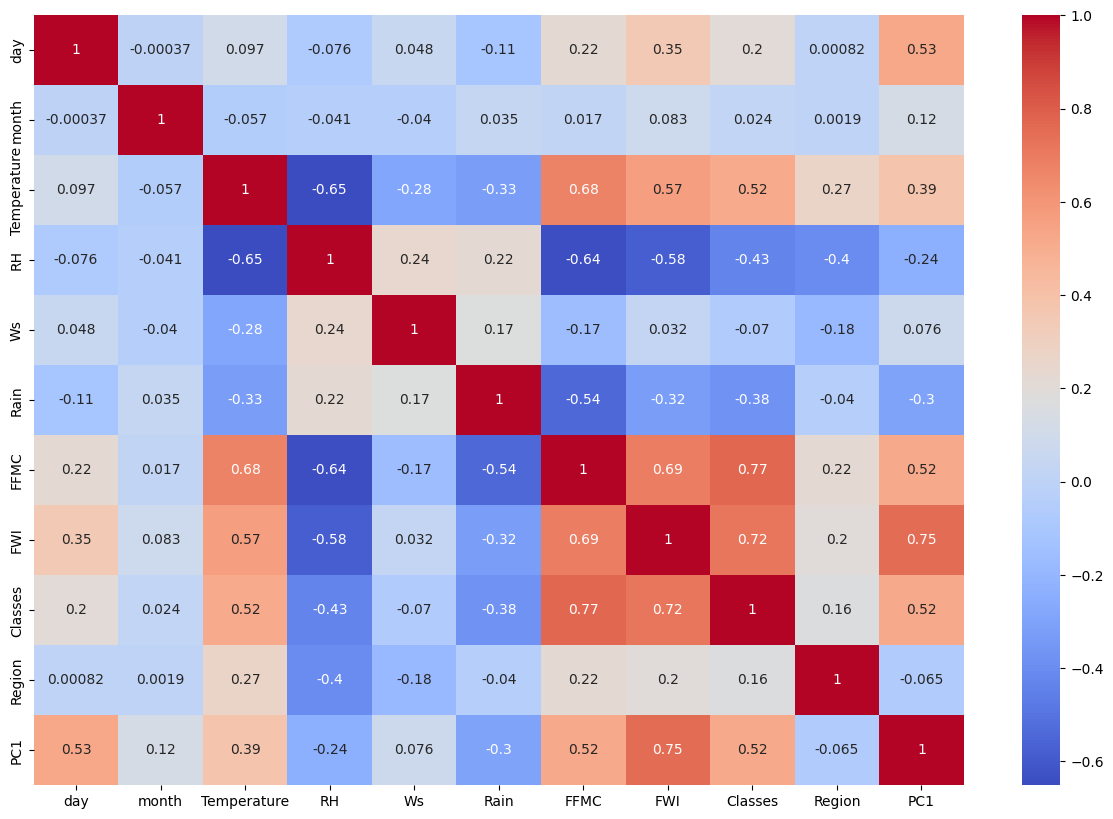

In [42]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [43]:
print('Split the data into input and target variable\n')
# split the data into Inputs and a target variable

X=df.drop(['FWI'], axis=1)
y=df['FWI']

print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train and Test data shape\n')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


scaler=StandardScaler()

x_train_sc=scaler.fit_transform(X_train)
x_test_sc=scaler.transform(X_test)

Split the data into input and target variable

(243, 10)
(243,)
Train and Test data shape

(194, 10) (49, 10) (194,) (49,)


In [44]:

# Define the parameter grid for multiple models including polynomial features
param_grid = [
    {
        'model': [Ridge(), Lasso(), ElasticNet()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'poly_features__degree': [1, 2, 3]  # Add degrees for polynomial features
    }
]

# Create a pipeline that includes PolynomialFeatures and a placeholder for the model
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),    # Add PolynomialFeatures to the pipeline
    ('model', Ridge())                          # Placeholder for the model, will be replaced by GridSearchCV
])

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train_sc, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_



print("Performance Metrics of GridSearchCV Model")

y_pred_gscv_tr=best_model.predict(x_train_sc) # prediction on train_data
y_pred_gscv_ts=best_model.predict(x_test_sc) # prediction on test_data

print()
print("="*150)
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_gscv_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_gscv_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_gscv_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_gscv_tr)))

print()
print("="*150)
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_gscv_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_gscv_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_gscv_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_gscv_ts)))

Best Parameters: {'model': Lasso(), 'model__alpha': 0.01, 'poly_features__degree': 2}
Best Score: -1.4634186096578128
Performance Metrics of GridSearchCV Model

Performance Metrics on train data
r2_score 0.9865641472178097
mean_absolute_error 0.6094349743371271
mean_squared_error 0.8151623023703464
root_mean_squared_error 0.9028633907576198

Performance Metrics on test data
r2_score 0.9683763481204662
mean_absolute_error 0.7238559218534883
mean_squared_error 0.958462970250999
root_mean_squared_error 0.9790112206971885
